In [8]:
import netCDF4 as nc
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#load the output filenames
path = '/pscratch/sd/f/fzahura/e3sm_scratch/pm-cpu/I1850CNRDCTCBC.NLDAS.1175.NTASKS128.ADspinup200.ARW.P/run/I1850CNRDCTCBC.NLDAS.1175.NTASKS128.ADspinup200.ARW.P.elm.h0.*.nc'
path1 = '/pscratch/sd/f/fzahura/e3sm_scratch/pm-cpu/I1850CNRDCTCBC.NLDAS.1175.NTASKS128.ADspinup200.ARW_2.P/run/I1850CNRDCTCBC.NLDAS.1175.NTASKS128.ADspinup200.ARW_2.P.elm.h0.*.nc'


filelist = glob.glob(path)
filelist_1 = glob.glob(path1)

filelist.extend(filelist_1)
print(len(filelist))
filelist.sort()

2400


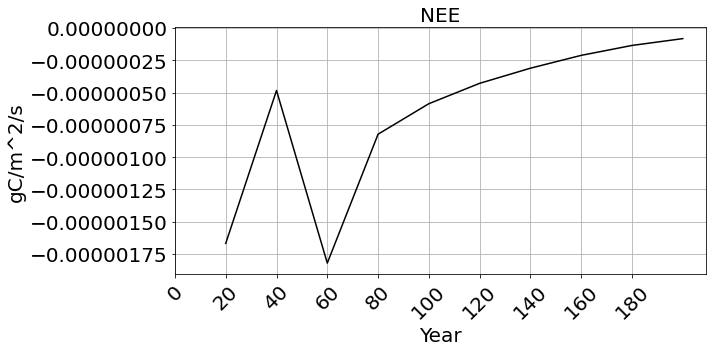

/tmp/ipykernel_1649201/407518530.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean['delta'][i] = df_mean['Mean_grid'][i]-df_mean['Mean_grid'][i-1]


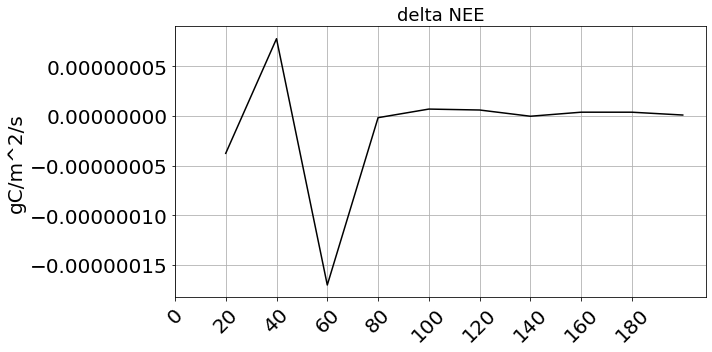

In [10]:
# varname_list = ['TOTVEGC','TOTECOSYSC','TOTSOMC','NEE']  #'TWS'#'TSOI' #'FSH' #'FPSN'
#name of the variable 
varname='NEE'
year=[]
mean_grid=[]
for file in filelist:
    # print(file.split('.')[-2])
    year.append(file.split('.')[-2].split('-')[0])
    nc_spinup = nc.Dataset(file)
    var = nc_spinup.variables[varname]
    #mean across the gridcells for each output timestep
    mean_grid.append(np.nanmean(var[:]))
#calculate annual average
df = pd.DataFrame({'Year':year,'Mean_grid':mean_grid})
df_mean = df.groupby('Year',as_index=False).mean()
n_years = len(df_mean)

#calculate mean across 20 years, which was the number of 
#years used to loop over the climate forcing during spinup
#number of years in environmental data * (resubmit+1)=total spinup years
s=0
e=20
resubmit = []
mean_20yr=[]
for resub in range(0,10):
    resubmit.append((1+resub)*20)
    # print(df_mean['Mean_grid'][s:e].mean())
    mean_20yr.append(df_mean['Mean_grid'][s:e].mean())
    s=s+20
    e=e+20
plt.figure(figsize=(10,5))
# plt.plot(df_mean.Year,df_mean.Mean_grid,color='black')

plt.plot(resubmit,mean_20yr,color='black')
plt.ylabel(nc_spinup.variables[varname].units,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks([i for i in range(0,200,20)],rotation = 45,fontsize=20)
plt.ticklabel_format(style='plain')
if varname == 'NEE':
    plt.title('NEE',fontsize=20)
else:
    plt.title(nc_spinup.variables[varname].long_name,fontsize=18, wrap=True)
plt.grid('on')
plt.tight_layout()
# plt.savefig('/global/homes/f/fzahura/Plots/Plot_BGC_spinup/AD_spinup_'+varname+'.jpg',dpi=300)
plt.show()

#calculate delta between each 20 years to check if the model becomes stable
df_mean20yr = pd.DataFrame({'Year':resubmit,'Mean_20yr':mean_20yr})
#mean delta 20 yrs
df_mean['delta'] = np.nan

for i in range(len(df_mean)):
    if i>0:
        df_mean['delta'][i] = df_mean['Mean_grid'][i]-df_mean['Mean_grid'][i-1]
n_years = len(df_mean)
s=0
e=20
resubmit = []
mean_delta_20yr=[]
for resub in range(0,20):
    resubmit.append((1+resub)*20)
    # print(df_mean['delta'][s:e].mean())
    mean_delta_20yr.append(df_mean['delta'][s:e].mean())
    s=s+20
    e=e+20

plt.figure(figsize=(10,5))
plt.plot(resubmit,mean_delta_20yr,color='black')
plt.ylabel(nc_spinup.variables[varname].units,fontsize=20)
plt.xticks([i for i in range(0,200,20)],rotation = 45,fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain')
if varname == 'NEE':
    plt.title('delta NEE',fontsize=18)
else:
    plt.title('delta '+nc_spinup.variables[varname].long_name,fontsize=18)
plt.grid('on')
plt.tight_layout()
# plt.savefig('/global/homes/f/fzahura/Plots/Plot_BGC_spinup/AD_spinup_delta_'+varname+'.jpg',dpi=300)
plt.show()
